In [1]:
# Notes on reading the ugly light curve files:
# MHJD is modified heliocentric julian date  =  HJD - 2400000.5
# MAG is the mag on the 2MASS system
# MER is the mag err
# SRC is the src of photometry, 2 = Kaluzny Vband   3 = Kaluzny Bband
# -1 = Fourstar H    -2 = Fourstar Ks  -5 = Fourstar J
# NUM is the number of averaged measurements that went into MAG.  Should
# be unity for everything

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import prettyplotlib as ppl
jhk_dir = '../Omega_Cen_phot/'

In [2]:
df_orig = pd.read_csv('final_data_files/kaluzny_2004_rrl_reformat.csv')

In [3]:
ids = df_orig.id.astype(int).astype(str).str.zfill(3).values

/Users/Meredith/anaconda2/envs/iraf27/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


no jhk data for 055
no jhk data for 096
file does not exist: 134
file does not exist: 159
file does not exist: 160
file does not exist: 181
file does not exist: 182
file does not exist: 183
file does not exist: 281
file does not exist: 283
no jhk data for 347
file does not exist: 351


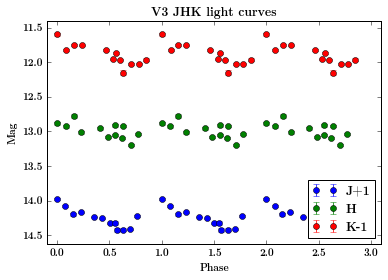

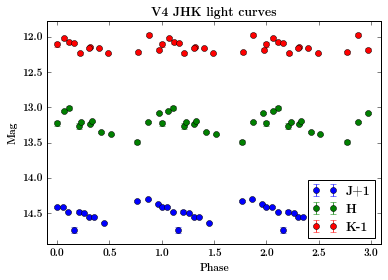

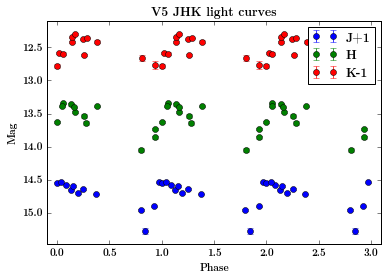

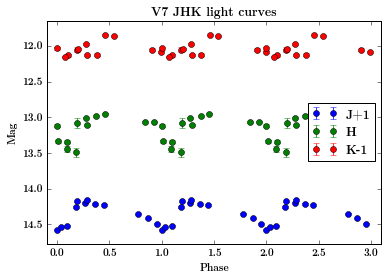

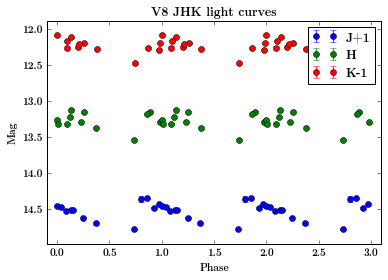

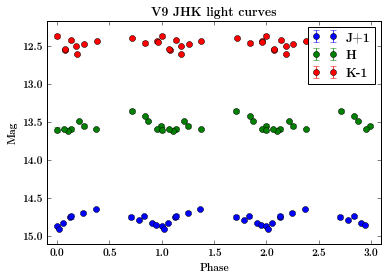

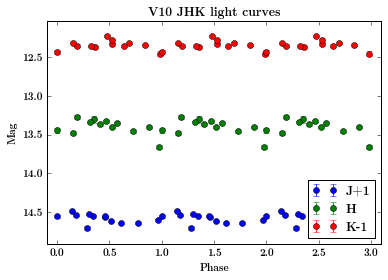

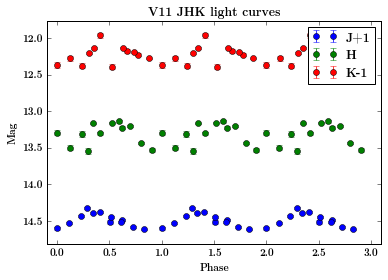

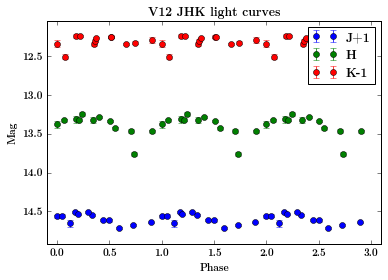

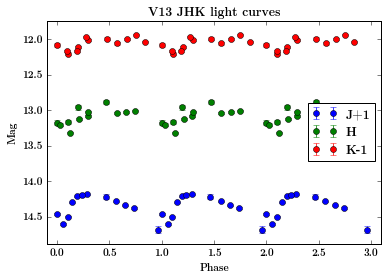

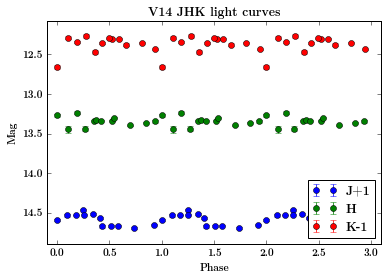

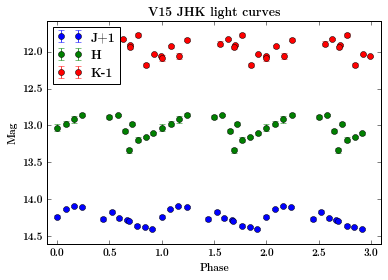

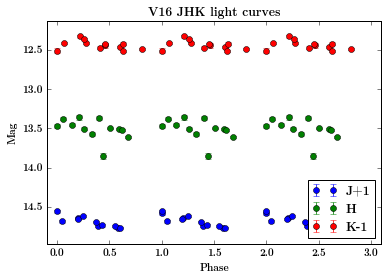

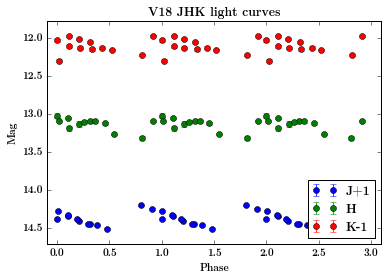

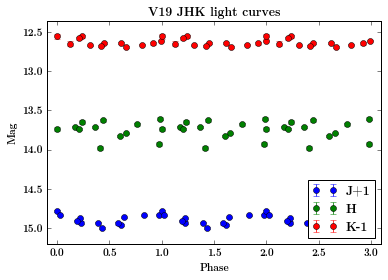

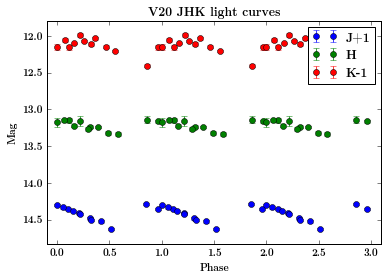

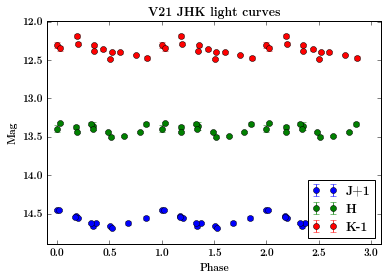

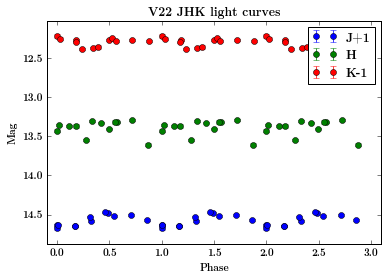

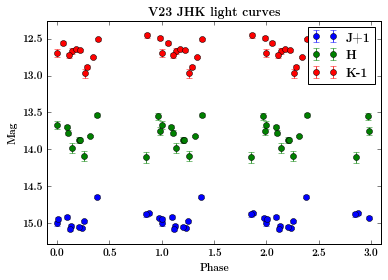

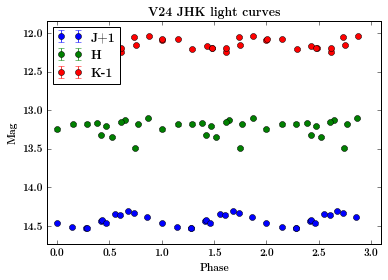

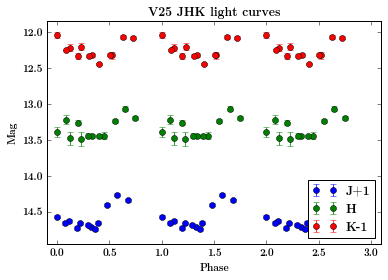

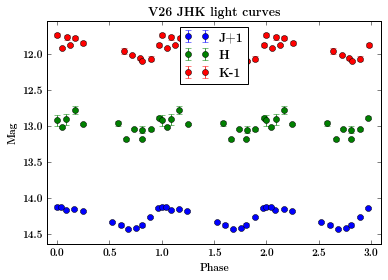

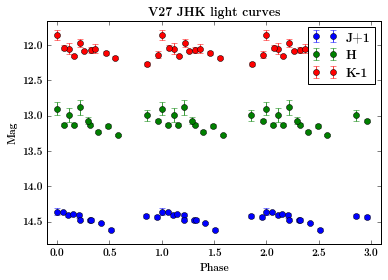

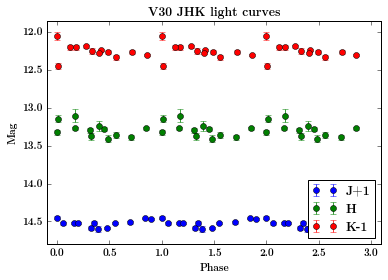

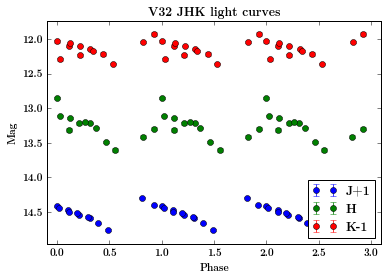

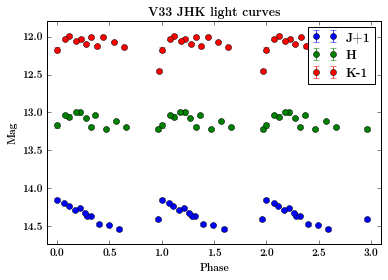

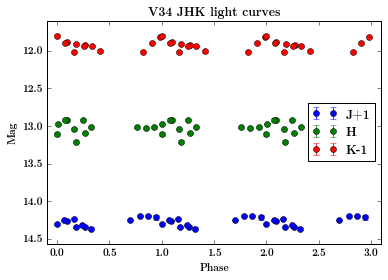

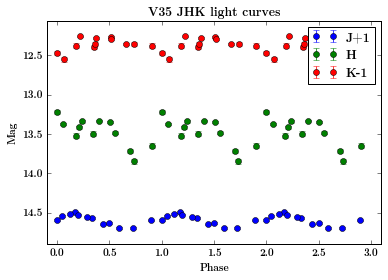

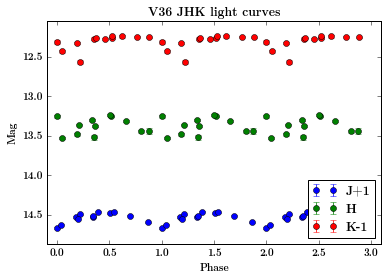

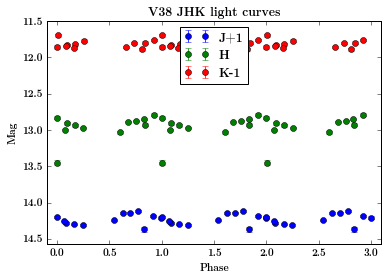

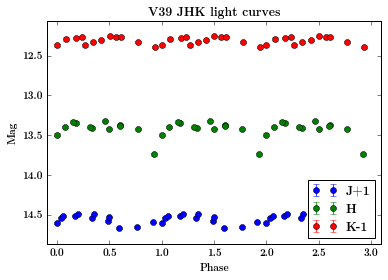

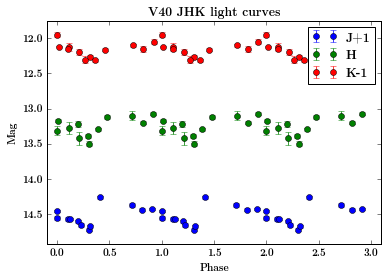

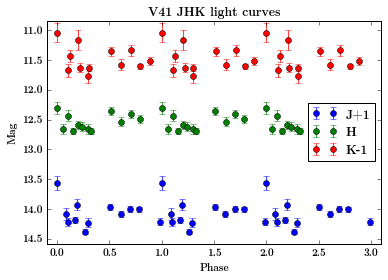

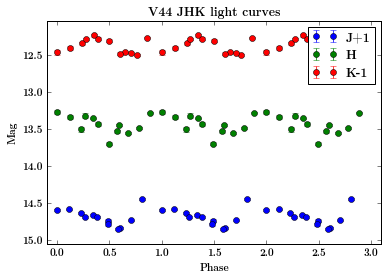

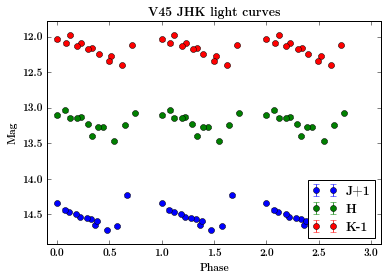

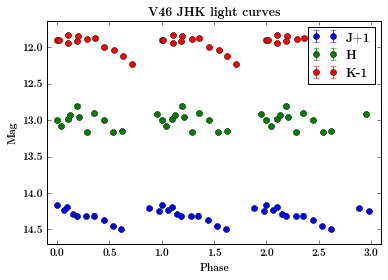

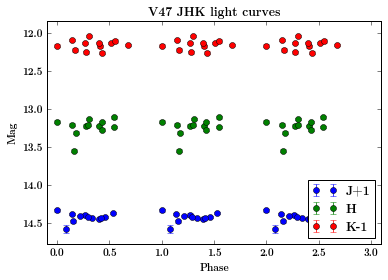

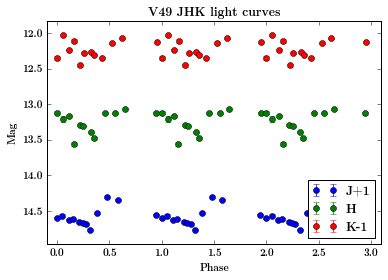

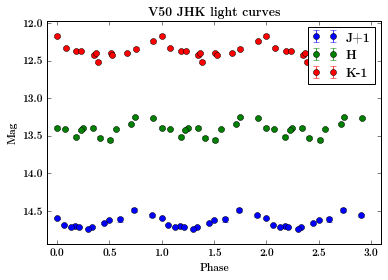

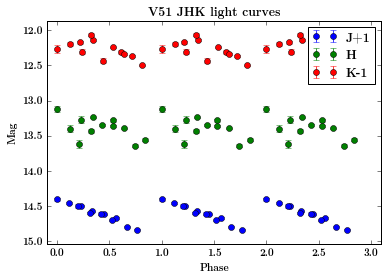

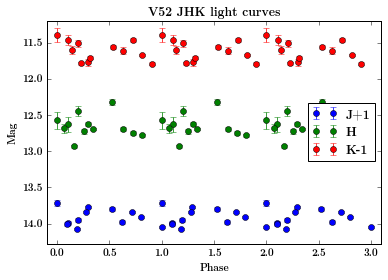

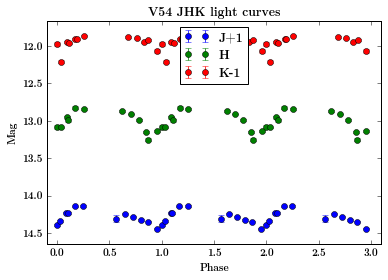

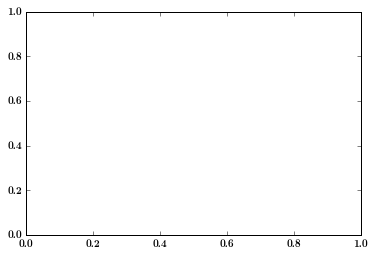

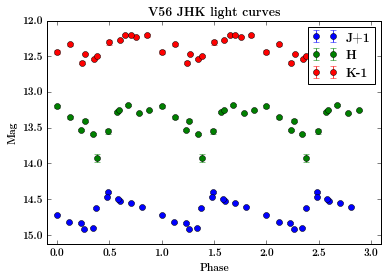

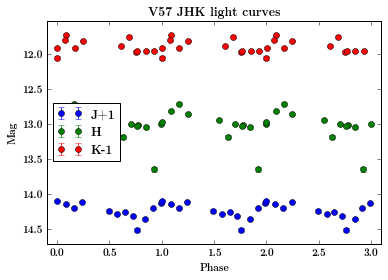

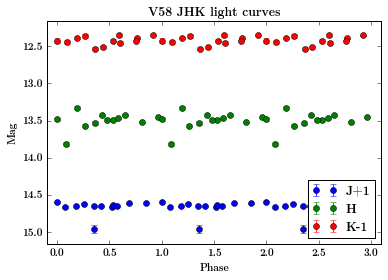

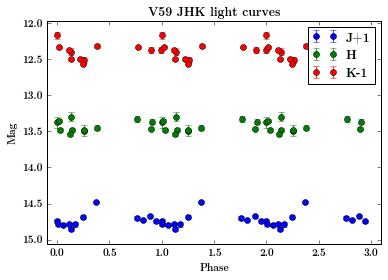

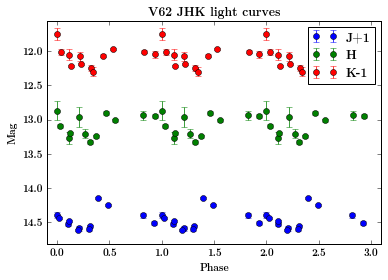

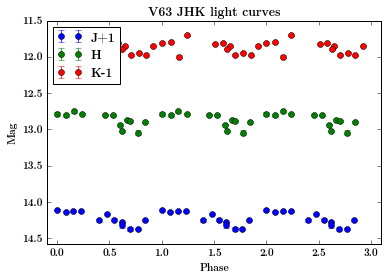

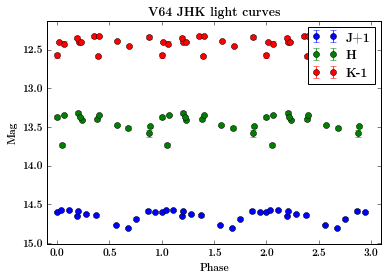

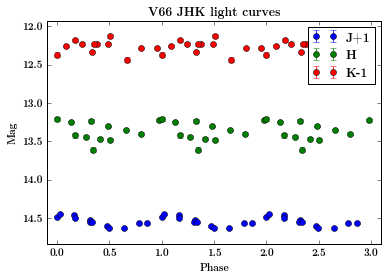

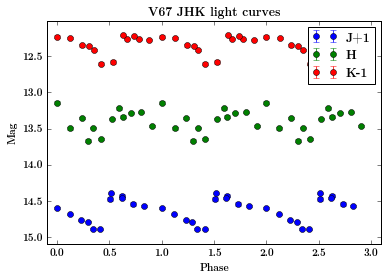

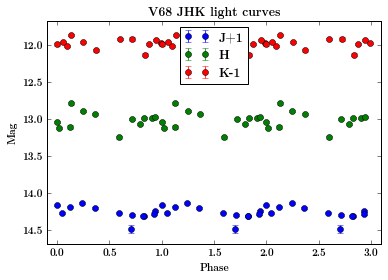

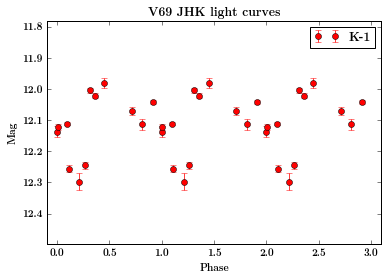

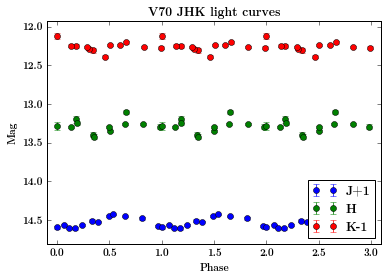

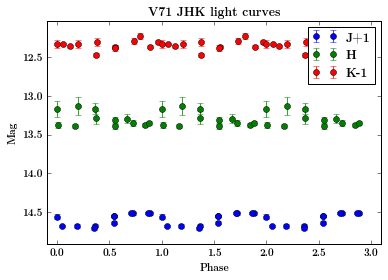

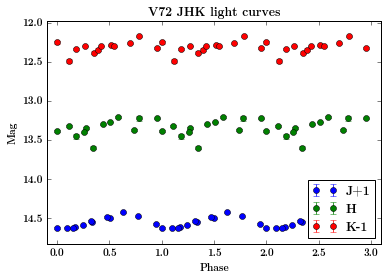

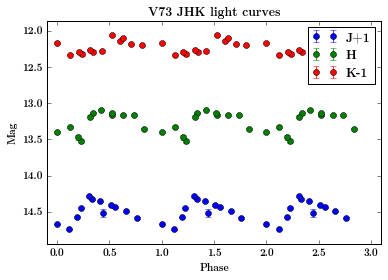

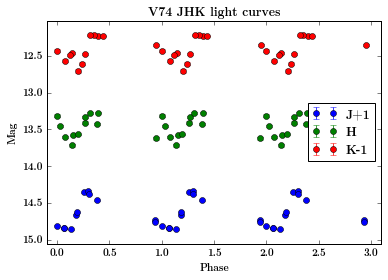

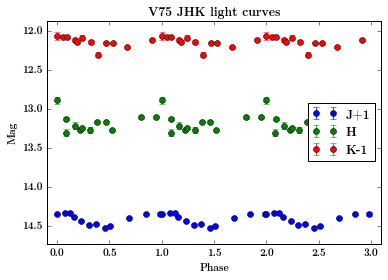

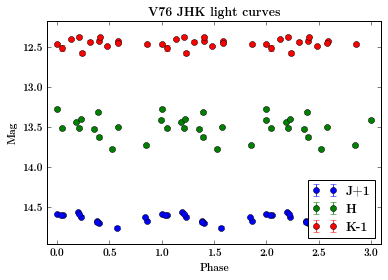

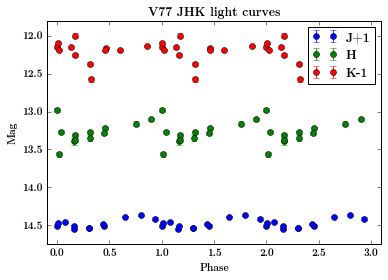

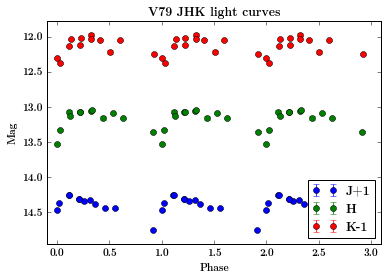

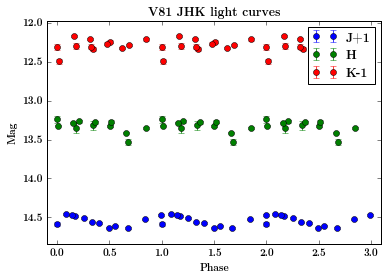

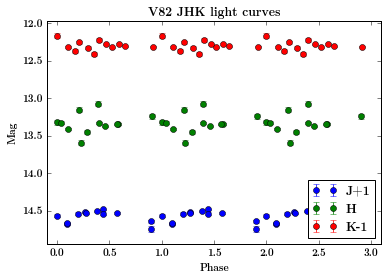

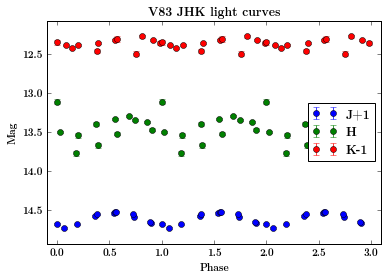

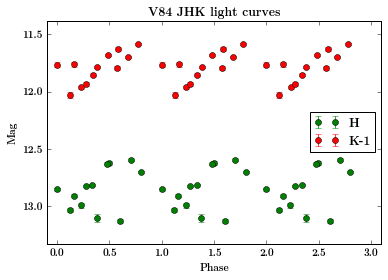

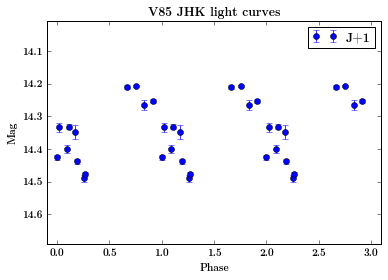

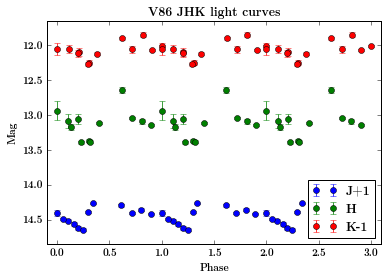

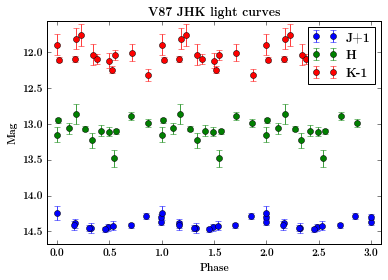

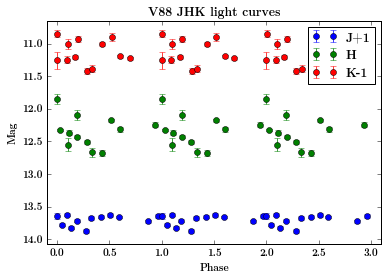

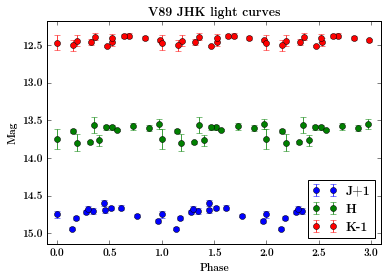

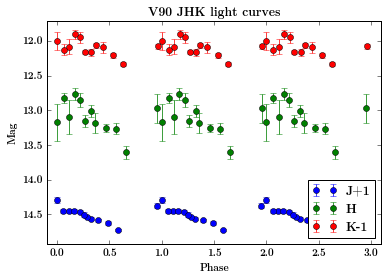

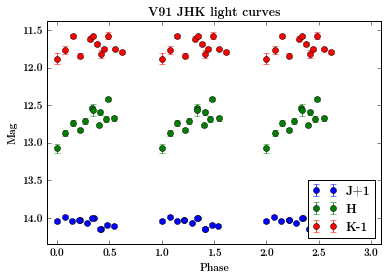

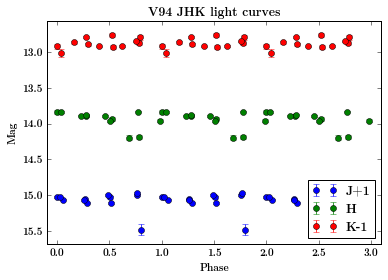

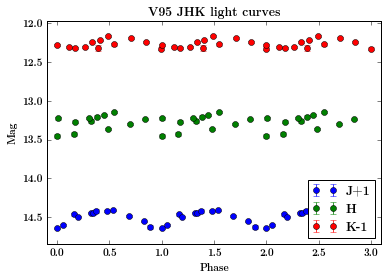

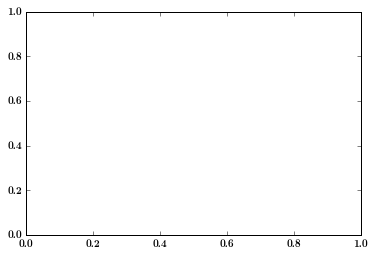

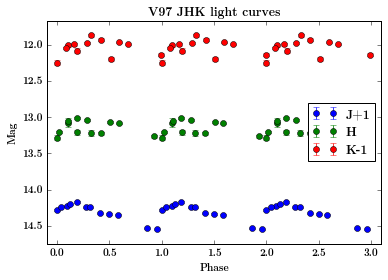

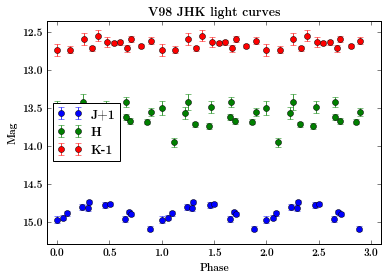

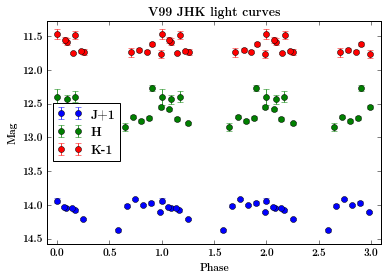

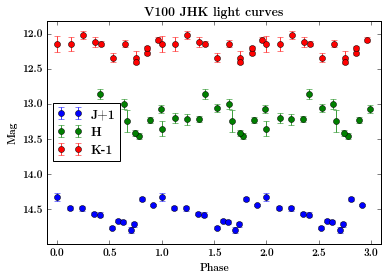

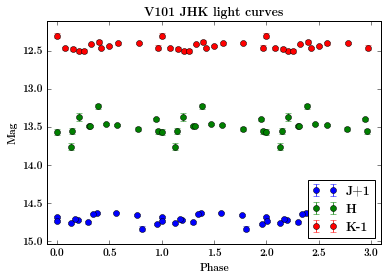

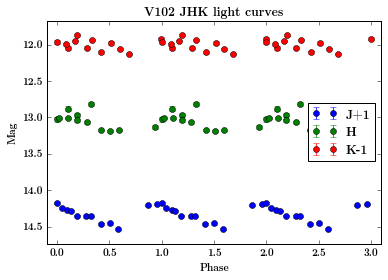

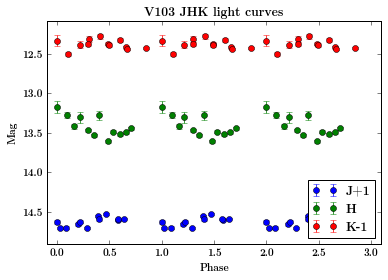

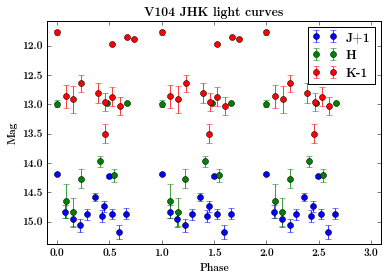

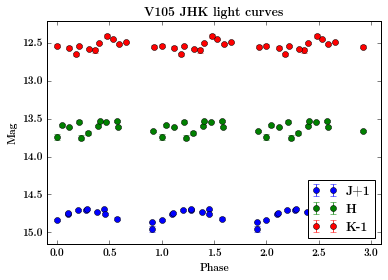

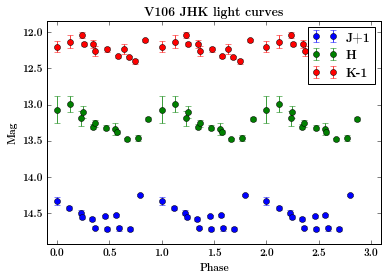

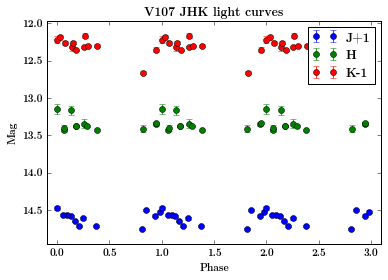

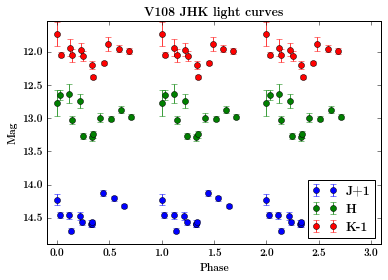

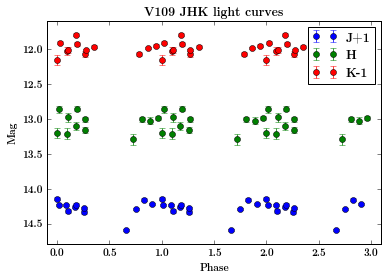

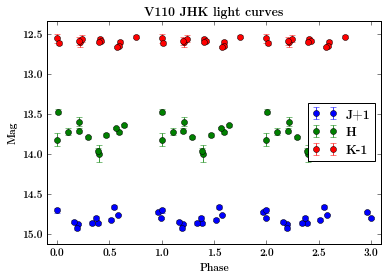

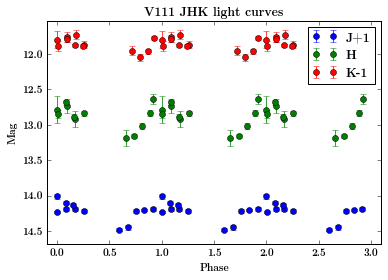

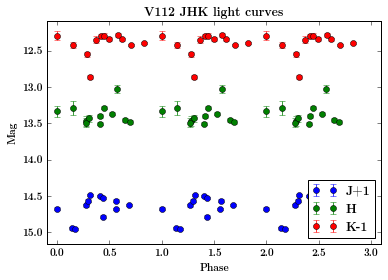

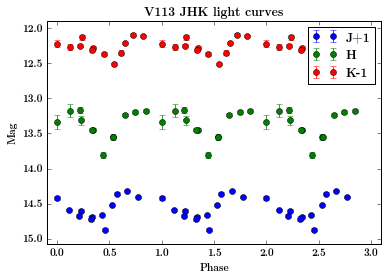

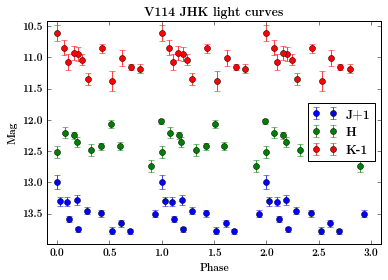

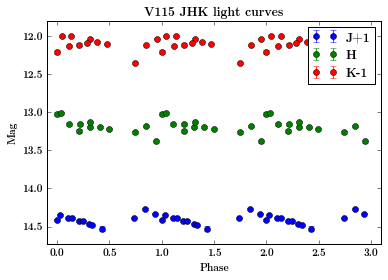

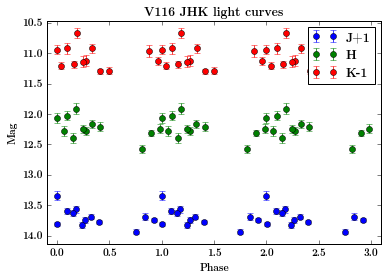

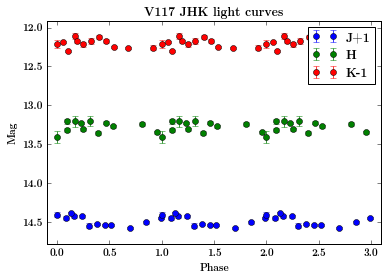

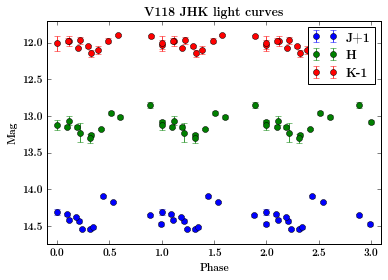

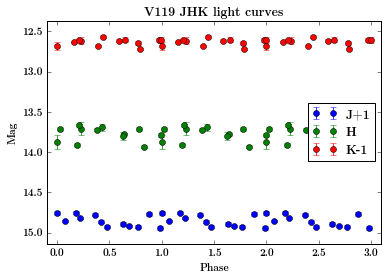

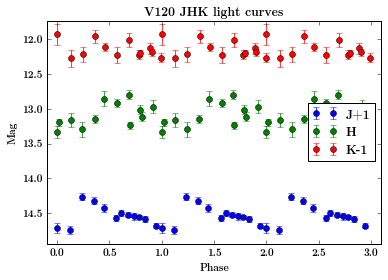

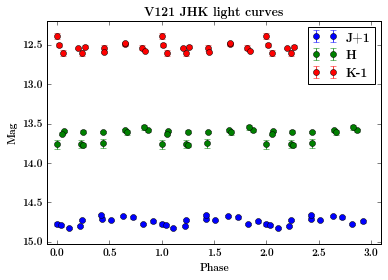

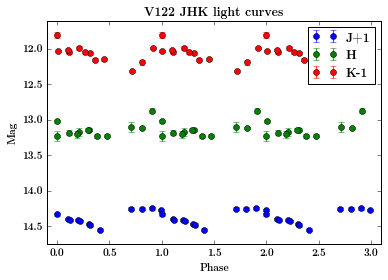

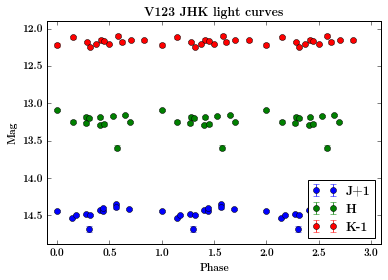

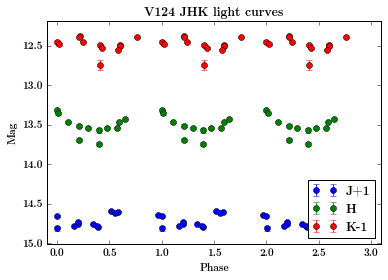

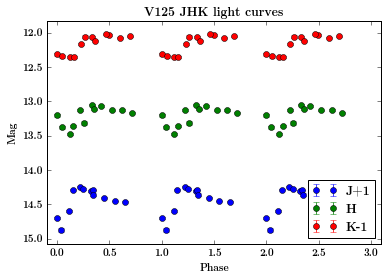

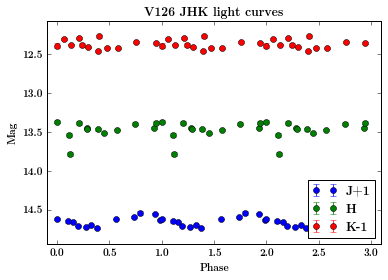

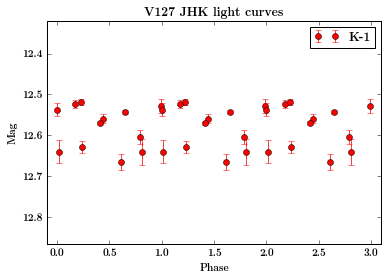

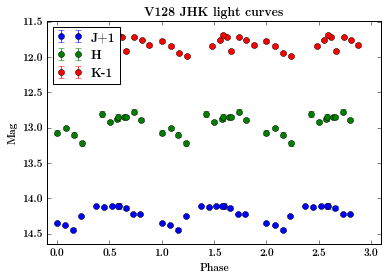

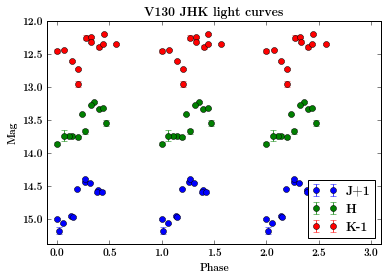

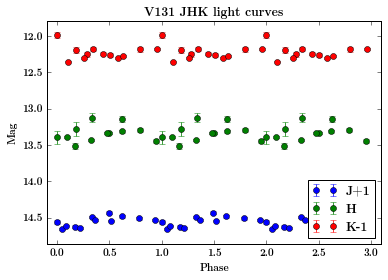

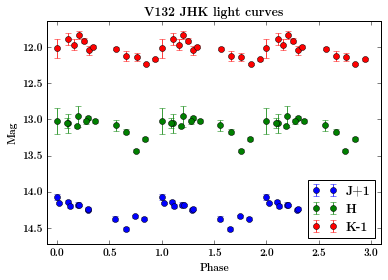

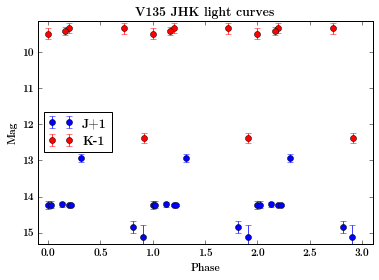

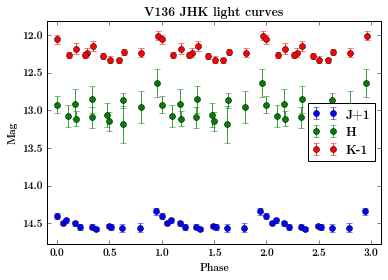

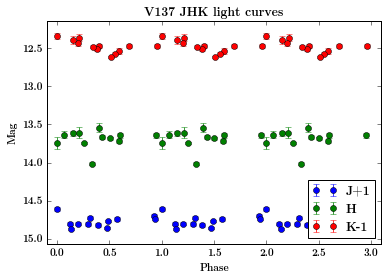

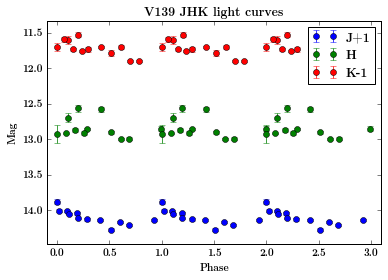

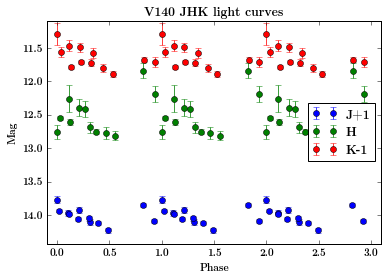

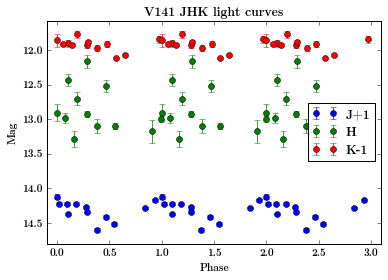

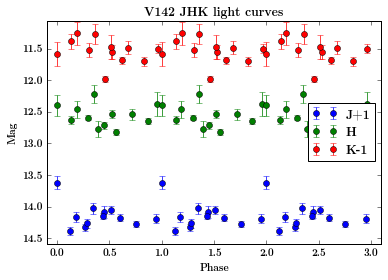

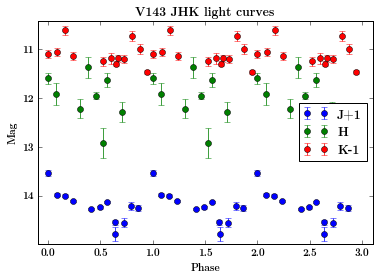

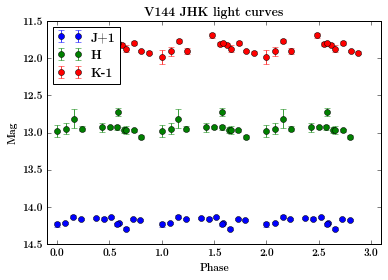

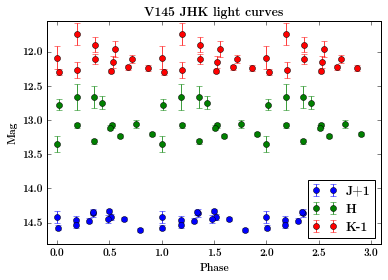

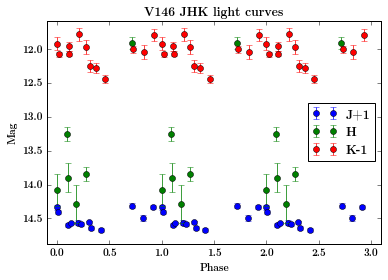

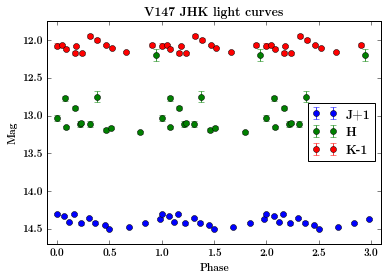

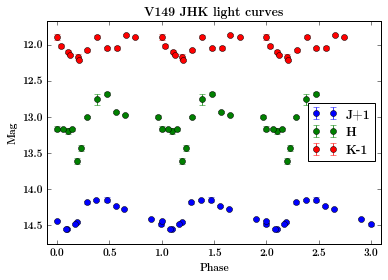

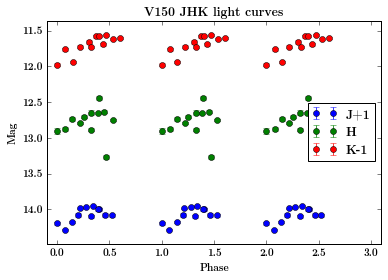

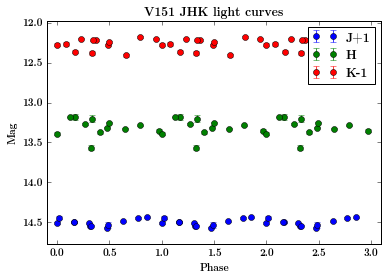

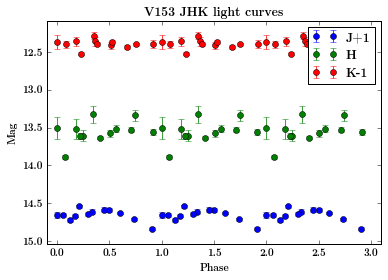

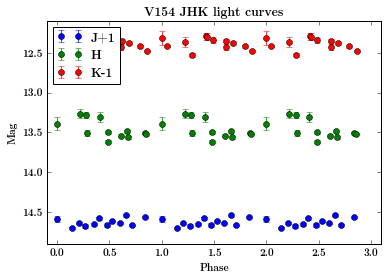

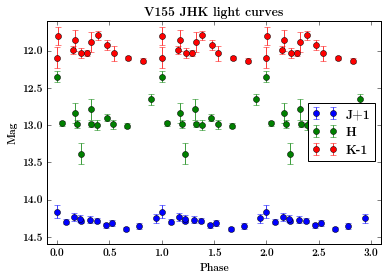

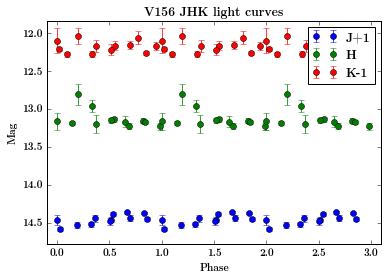

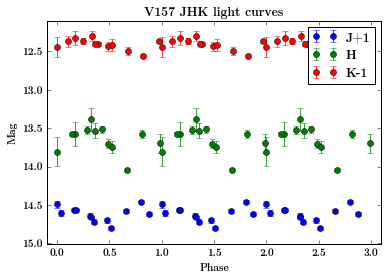

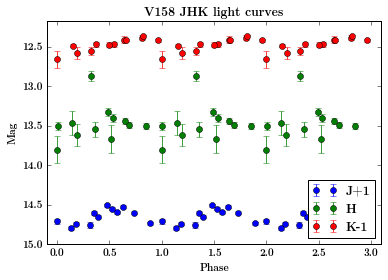

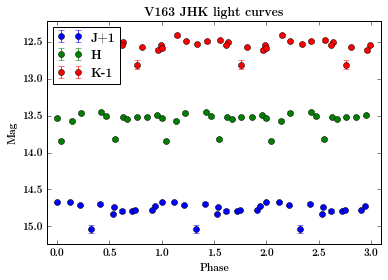

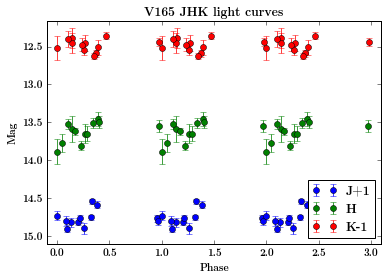

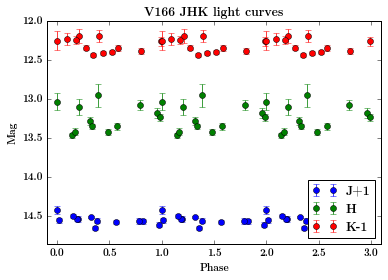

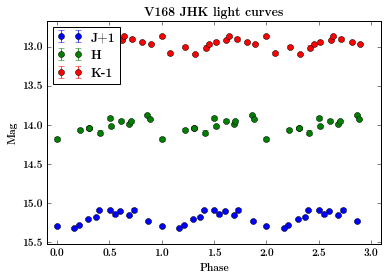

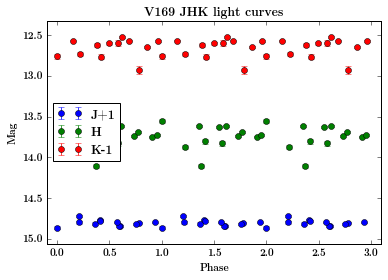

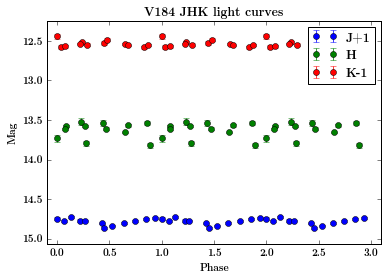

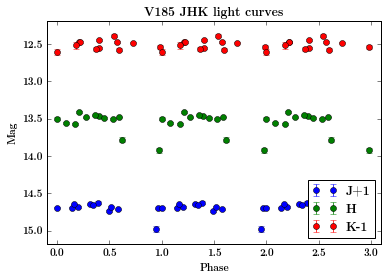

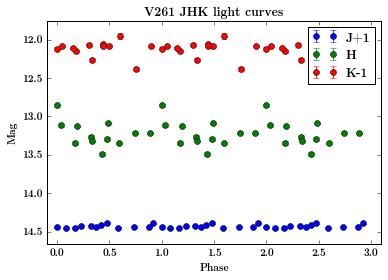

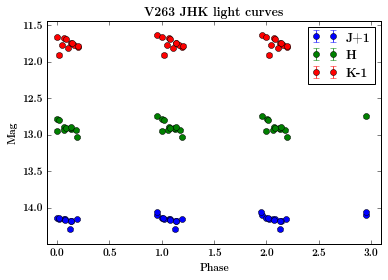

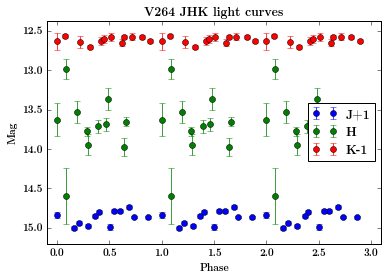

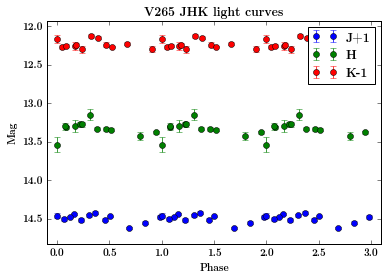

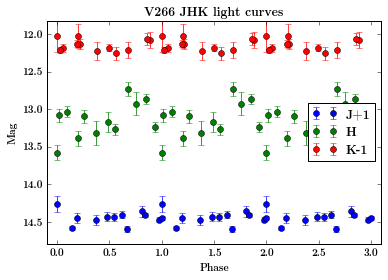

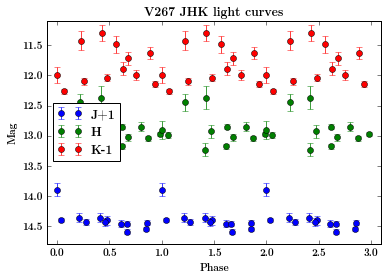

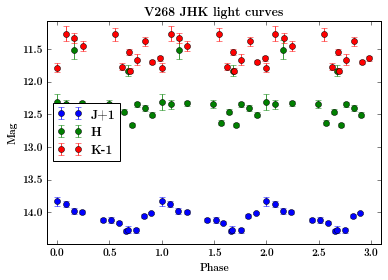

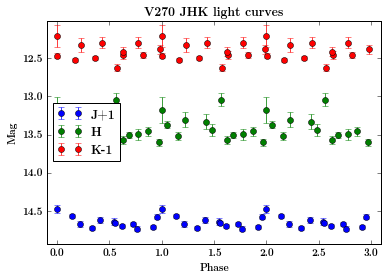

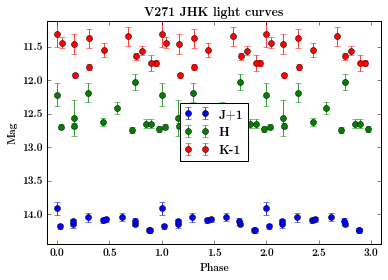

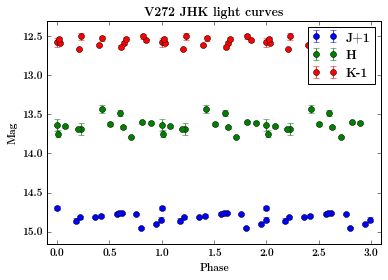

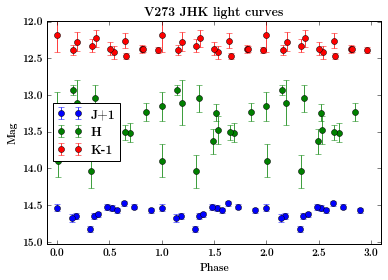

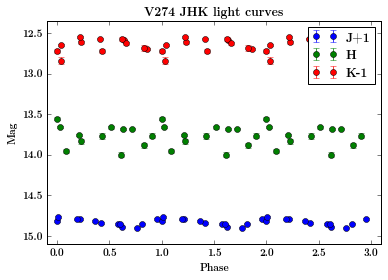

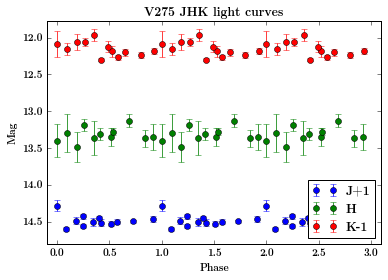

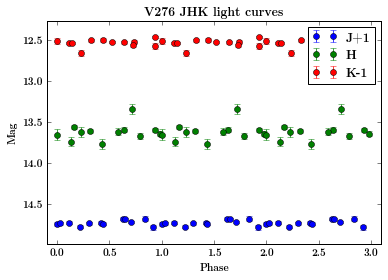

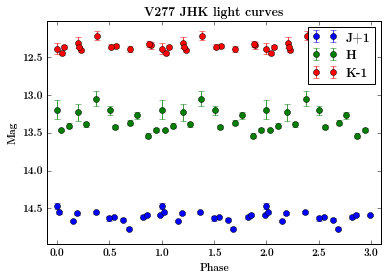

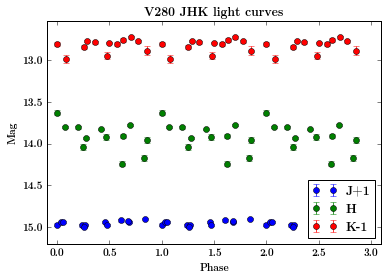

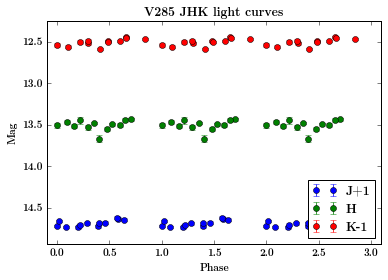

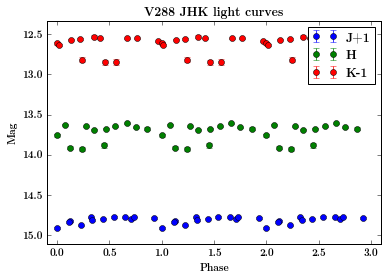

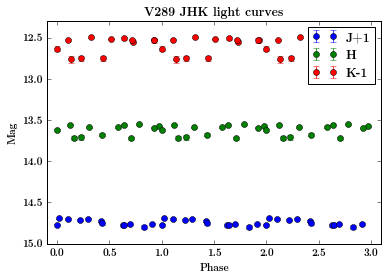

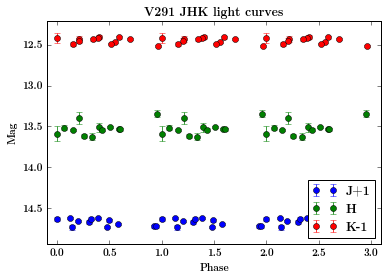

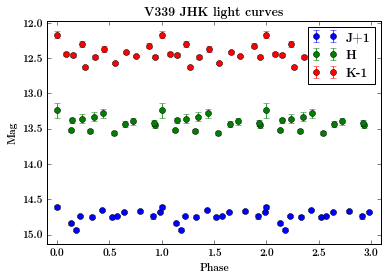

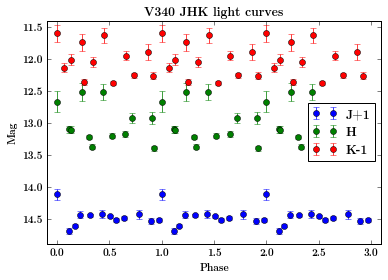

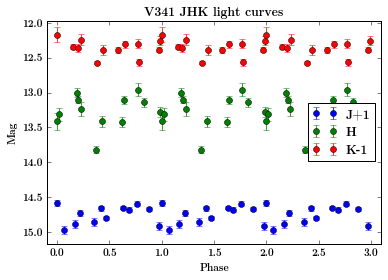

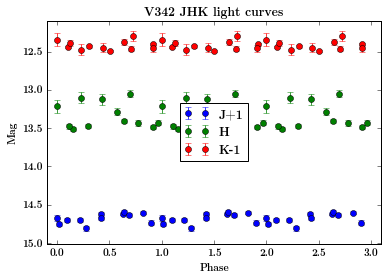

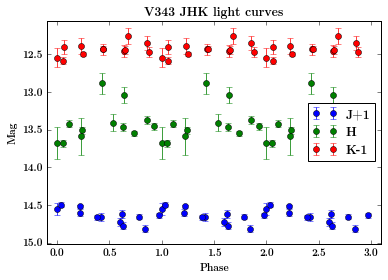

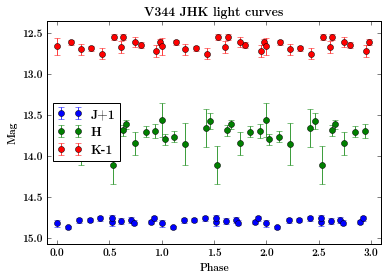

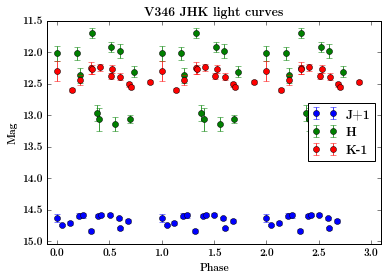

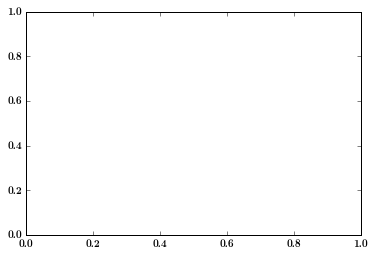

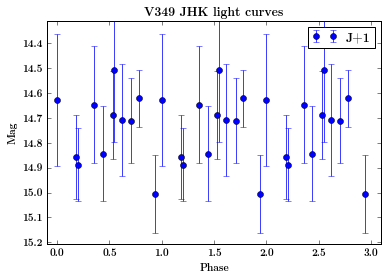

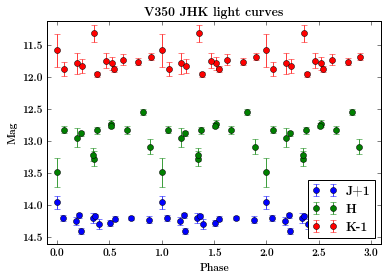

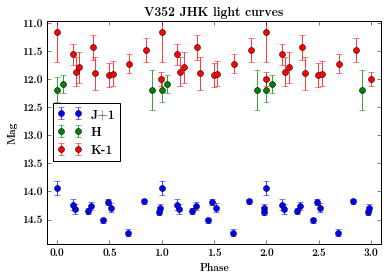

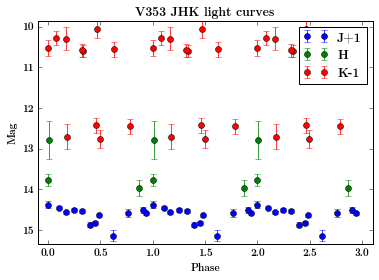

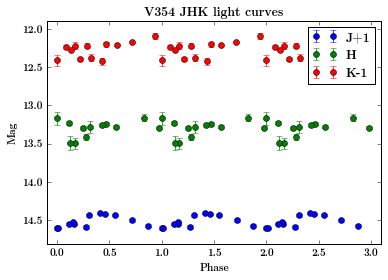

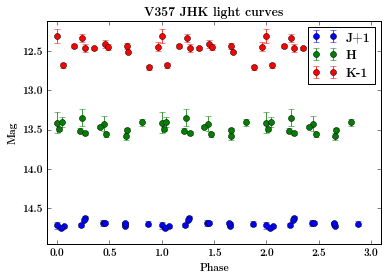

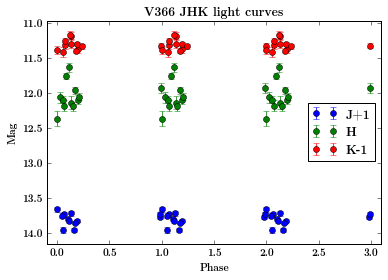

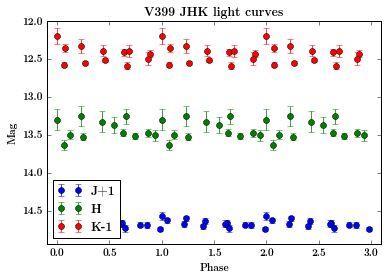

In [4]:
for obj in ids:
    fname = os.path.join(jhk_dir, '{}.txt'.format(obj))
    if os.path.exists(fname):
        fig,ax = plt.subplots(1,1)
        per = df_orig.per[df_orig.id == float(obj)].values[0]
        df = pd.read_csv(fname, delim_whitespace=True, names=['mjd','mag','merr','band','n'])
        df_j = df[df.band==-5]
        df_h = df[df.band==-1]
        df_k = df[df.band==-2]
        if ((df_j.shape[0]+df_h.shape[0]+df_k.shape[0]) > 0):
            phase_j = (df_j.mjd - df_j.mjd.min())/per
            phase_h = (df_h.mjd - df_h.mjd.min())/per
            phase_k = (df_k.mjd - df_k.mjd.min())/per
            if df_j.shape[0] > 0:
                ppl.errorbar(ax,phase_j - phase_j.astype(int), df_j.mag+1,
                             yerr=df_j.merr.values, fmt='o', label='J+1', color='b')
                ppl.errorbar(ax,phase_j - phase_j.astype(int)+1,df_j.mag+1,
                             yerr=df_j.merr.values, fmt='o', label=None, color='b')
                ppl.errorbar(ax,phase_j - phase_j.astype(int)+2, df_j.mag+1,
                             yerr=df_j.merr.values, fmt='o', label=None, color='b')
            if df_h.shape[0] > 0:
                ppl.errorbar(ax,phase_h - phase_h.astype(int), df_h.mag,
                             yerr=df_h.merr.values, fmt='o',label='H',color='g')
                ppl.errorbar(ax,phase_h - phase_h.astype(int)+1, df_h.mag,
                             yerr=df_h.merr.values, fmt='o', label=None, color='g')
                ppl.errorbar(ax,phase_h - phase_h.astype(int)+2, df_h.mag,
                             yerr=df_h.merr.values, fmt='o', label=None, color='g')
            if df_k.shape[0] > 0:
                ppl.errorbar(ax,phase_k - phase_k.astype(int), df_k.mag-1,
                             yerr=df_k.merr.values, fmt='o',label='K-1',color='r')
                ppl.errorbar(ax,phase_k - phase_k.astype(int)+1, df_k.mag-1,
                             yerr=df_k.merr.values, fmt='o', label=None, color='r')
                ppl.errorbar(ax,phase_k - phase_k.astype(int)+2, df_k.mag-1,
                             yerr=df_k.merr.values, fmt='o', label=None, color='r')
            mags = pd.concat([df_j.mag+1,df_h.mag,df_k.mag-1])
            ax.set_ylim(mags.max()+0.2,mags.min()-0.2)
            ax.set_xlim(-0.1,3.1)
            ax.set_xlabel('Phase')
            ax.set_ylabel('Mag')
            ax.set_title('V{} JHK light curves'.format(int(obj)))
            ax.legend(loc=0)
            fig.savefig('../light_curves/jhk_{}_lightcurves.pdf'.format(int(obj)))
        else:
            print 'no jhk data for', obj
    else:
        print 'file does not exist:', obj